In [ ]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


# IMPORTING LIBRARIES

In [ ]:
from os import fchmod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Data

In [ ]:
# Import files

train = pd.read_csv('/content/fordTrain.csv')
test = pd.read_csv('/content/fordTest.csv')

# Data Audit

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [ ]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [ ]:
train.shape

(604329, 33)

In [ ]:
test.shape

(120840, 33)

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

In [ ]:
train[train['P6'] >= 228812]

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
452155,374,58,1,77.8864,-4.232130,1392,43.1034,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.64218
452156,374,59,1,72.8206,0.802547,1392,43.1034,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.50570
452157,374,60,1,72.5809,20.106300,1392,43.1034,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.52682
452158,374,61,1,74.8092,18.949200,1392,43.1034,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.59690
452159,374,62,1,76.6599,13.521500,1392,43.1034,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.65109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452222,374,125,1,67.5442,5.962360,1060,56.6038,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,7.02393
452223,374,126,1,66.2899,3.762050,1060,56.6038,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.98903
452224,374,127,1,65.4340,0.013524,1060,56.6038,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.96237
452225,374,128,1,64.2594,-2.498630,1060,56.6038,0.107678,228812,0.262224,...,-0.28,496,114.013,1,649,0,0.0,0,3,6.94385


<Axes: >

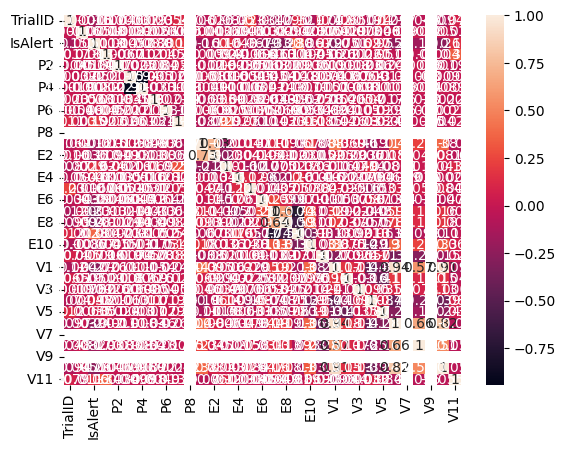

In [ ]:
sns.heatmap(train.corr(), annot = True)

# Model Imputation

Devide Data into X and Y

In [ ]:
x = train.iloc[:,3:]
y = train['IsAlert']

In [ ]:
print(x.shape)
print(y.shape)

(604329, 30)
(604329,)


Split data into train test

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


Logistic Regression Model

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,  y_train)
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  class_rep = classification_report(actual,predicted)
  print('model accuracy is:',round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [ ]:
model_eval(y_train, preds_lr_train)

model accuracy is: 0.71
[[130399  72928]
 [ 65193 214943]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    203327
           1       0.75      0.77      0.76    280136

    accuracy                           0.71    483463
   macro avg       0.71      0.70      0.71    483463
weighted avg       0.71      0.71      0.71    483463



In [ ]:
model_eval(y_test, preds_lr_test)

model accuracy is: 0.71
[[32998 18219]
 [16315 53334]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66     51217
           1       0.75      0.77      0.76     69649

    accuracy                           0.71    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.71      0.71    120866



Apply Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
pred_dtree_train = dtree.predict(x_train)
pred_dtree_test = dtree.predict(x_test)

In [ ]:
model_eval(y_train, pred_dtree_train)

model accuracy is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test, pred_dtree_test)

model accuracy is: 0.99
[[50482   735]
 [  765 68884]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



Apply Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 150, verbose = 2)
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.2min


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.4s


In [ ]:
model_eval(y_train, preds_rf_train)


model accuracy is: 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test, preds_rf_test)

model accuracy is: 0.99
[[50652   565]
 [   73 69576]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
importances = list(zip(rf.feature_importances_, x_train.columns))
importances.sort(reverse = True)
print(importances)

[(0.1543285440465016, 'V11'), (0.10080322754684255, 'E10'), (0.06158335610953652, 'E8'), (0.0596954203122624, 'E9'), (0.059299653548360066, 'E7'), (0.05621383442048117, 'P7'), (0.05547855817873927, 'V1'), (0.05506840770795884, 'E6'), (0.05413121975170424, 'P6'), (0.04502881198682583, 'V6'), (0.04272628139975976, 'P5'), (0.03708735390894045, 'E5'), (0.027709745272634555, 'P1'), (0.025719783738737404, 'V4'), (0.023465374787234487, 'E2'), (0.02157721166547371, 'V10'), (0.01982643360478844, 'V8'), (0.01729996738903892, 'V2'), (0.016096594737339938, 'E4'), (0.01536509536935573, 'E1'), (0.011635307551710805, 'V3'), (0.011440293556333357, 'P4'), (0.011432727455975194, 'P3'), (0.0050526341329729515, 'P2'), (0.004126423510534925, 'E11'), (0.003945578936928004, 'E3'), (0.0038621593730289107, 'V5'), (0.0, 'V9'), (0.0, 'V7'), (0.0, 'P8')]


application on test dataset

In [ ]:
test_1 = test.iloc[:,3:]

In [ ]:
test_1.head()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [ ]:
test['IsAlert'] = rf.predict(test_1)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


In [ ]:
test['IsAlert']

0         1
1         1
2         1
3         1
4         1
         ..
120835    1
120836    1
120837    1
120838    1
120839    1
Name: IsAlert, Length: 120840, dtype: int64

Read actual from solution.csv file

In [ ]:
solution = pd.read_csv('/content/Solution.csv')


In [ ]:
solution.head()

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private


In [ ]:
model_eval(solution['Prediction'], test['IsAlert'])

model accuracy is: 0.83
[[16420 13494]
 [ 7560 83366]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     29914
           1       0.86      0.92      0.89     90926

    accuracy                           0.83    120840
   macro avg       0.77      0.73      0.75    120840
weighted avg       0.82      0.83      0.82    120840



In [ ]:
import pickle

In [ ]:
with open("rf_model.pkl", "wb") as f:
  pickle.dump(rf, f)



In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [ ]:
import gradio as gr

In [ ]:
x_train.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
      dtype='object')

PCA Model Evaluation

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 15)

In [ ]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [ ]:
x_train_pca

array([[-2.96003063e+02,  4.32073538e+02,  4.19329295e+02, ...,
        -2.71338286e+00, -6.32875738e+00, -1.31634310e+00],
       [-2.39302729e+02, -9.55625303e+02, -1.37689924e+02, ...,
         3.11279526e+00,  7.00548694e+00, -4.18689755e+00],
       [-6.02172182e+00,  2.30945060e+02,  7.74411823e+02, ...,
         1.40577086e+01, -7.74121730e+00,  4.98208388e+00],
       ...,
       [-1.88152150e+02,  3.25281617e+02, -2.18991153e+02, ...,
        -1.50636540e+00, -5.95621019e+00, -4.54099248e+00],
       [-2.04313917e+02,  3.50706914e+02, -2.05821063e+02, ...,
         1.13395268e+01, -7.11529256e+00, -4.33166796e+00],
       [ 2.74071216e+02, -1.09716212e+03,  9.43924000e+01, ...,
         6.12702524e-01,  5.20624257e+00, -1.14592939e+00]])

In [ ]:
x_test_pca

array([[ 2.38038807e+02,  3.30437916e+02,  5.99220815e+02, ...,
        -5.24549597e+00, -4.58306963e+00,  3.59582260e+00],
       [-5.01331069e+01, -1.04919370e+03, -3.67303321e+02, ...,
         3.88600381e+00,  1.39146549e+01, -8.43670074e-01],
       [ 1.76634601e+02,  4.65392336e+02,  2.67729367e+02, ...,
        -5.67551744e+00,  1.63033571e+01, -7.45424472e+00],
       ...,
       [-6.23659503e+01,  2.81647743e+02,  1.06383722e+02, ...,
         1.49785805e+01,  8.77896377e+00, -4.31516437e+00],
       [ 1.71354194e+02, -1.10519333e+03,  2.95453832e+02, ...,
         5.63752947e-01,  6.77829454e+00, -5.67573759e+00],
       [ 3.87432683e+01,  4.10229936e+01, -1.94634404e+02, ...,
        -1.13333946e+01, -3.42162954e+00,  6.69216256e-01]])

In [ ]:
pca.explained_variance_ratio_

array([9.11849581e-01, 5.72285004e-02, 1.44124984e-02, 1.31148439e-02,
       2.42348618e-03, 4.85759553e-04, 1.87925137e-04, 1.10957842e-04,
       5.39701425e-05, 4.30234043e-05, 3.27933676e-05, 1.63801177e-05,
       1.08546778e-05, 9.48980944e-06, 6.60543447e-06])

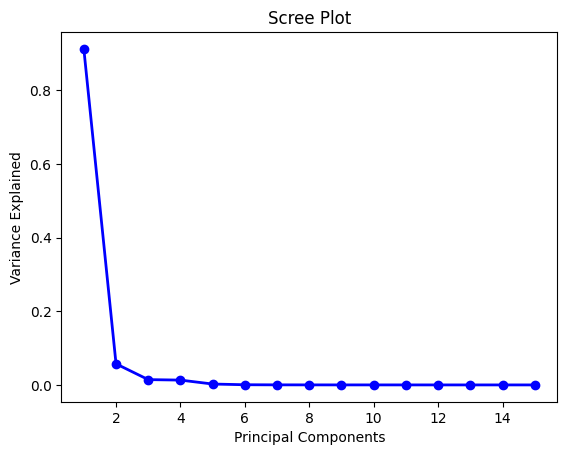

In [ ]:
pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = 'blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()


Logistic Regression with PCA

In [ ]:
print(x_train.shape)
print(x_train_pca.shape)
print(x_test.shape)
print(x_test_pca.shape)

(483463, 30)
(483463, 15)
(120866, 30)
(120866, 15)


In [ ]:
lr_pca =LogisticRegression()
lr_pca.fit(x_train_pca, y_train)
preds_lr_pca_train = lr_pca.predict(x_train_pca)
preds_lr_pca_test = lr_pca.predict(x_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_eval(y_train, preds_lr_pca_train)

model accuracy is: 0.69
[[159235  44092]
 [105546 174590]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68    203327
           1       0.80      0.62      0.70    280136

    accuracy                           0.69    483463
   macro avg       0.70      0.70      0.69    483463
weighted avg       0.72      0.69      0.69    483463



In [ ]:
model_eval(y_test, preds_lr_pca_test)

model accuracy is: 0.69
[[40156 11061]
 [26136 43513]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     51217
           1       0.80      0.62      0.70     69649

    accuracy                           0.69    120866
   macro avg       0.70      0.70      0.69    120866
weighted avg       0.72      0.69      0.69    120866



Decision Tree with PCA

In [ ]:
dtree_pca = DecisionTreeClassifier(max_depth = 5)
dtree_pca.fit(x_train_pca, y_train)
preds_dtree_pca_train = dtree_pca.predict(x_train_pca)
preds_dtree_pca_test = dtree_pca.predict(x_test_pca)

In [ ]:
model_eval(y_train, preds_dtree_pca_train)

model accuracy is: 0.77
[[136255  67072]
 [ 42126 238010]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71    203327
           1       0.78      0.85      0.81    280136

    accuracy                           0.77    483463
   macro avg       0.77      0.76      0.76    483463
weighted avg       0.77      0.77      0.77    483463



In [ ]:
model_eval(y_test, preds_dtree_pca_test)

model accuracy is: 0.77
[[34390 16827]
 [10668 58981]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71     51217
           1       0.78      0.85      0.81     69649

    accuracy                           0.77    120866
   macro avg       0.77      0.76      0.76    120866
weighted avg       0.77      0.77      0.77    120866

